In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
sigmoid(1000)

1.0

In [7]:
sigmoid(-50)

1.928749847963918e-22

In [8]:
sigmoid(0)

0.5

In [13]:
x = np.arange(-10, 10, 0.1)
y_ = sigmoid(x)

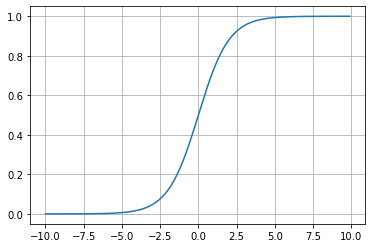

In [14]:
plt.plot(x, y_)
plt.grid('on')

In [15]:
def log_loss(y, y_hat):
    return -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)

In [16]:
y = 1
y_hat = 0.99

log_loss(y, y_hat)

0.01005033585350145

In [17]:
y = 1
y_hat = 0.99999

log_loss(y, y_hat)

1.0000050000287824e-05

In [18]:
y = 1
y_hat = 0.9

log_loss(y, y_hat)

0.10536051565782628

In [19]:
y = 1
y_hat = 0.8

log_loss(y, y_hat)

0.2231435513142097

In [21]:
y = 1
y_hat = 0.01

log_loss(y, y_hat)

4.605170185988091

In [23]:
y = 0
y_hat = 0.95

log_loss(y, y_hat)

2.99573227355399

In [26]:
y = 0
y_hat = 0.01

log_loss(y, y_hat)

0.01005033585350145

## Scratch Implementation

In [31]:
def predict(X, W):
    '''
    X : (n,d) it'a input matrix
    W : (d, 1) all the weights
    '''
    z = np.dot(X,W)
    return sigmoid(z)

In [32]:
def error(X, y, W):

    y_hat = predict(X, W)
    
    err = np.mean(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
    
    return err

In [29]:
def gradient(X, y, W):
    y_hat = predict(X, W)
    grad = np.dot(X.T , y_hat - y )

    return grad/len(X)

In [30]:
def gradient_descent(X, Y, n_itr = 400, eta = 0.1):
    weights =  np.random.randn(X.shape[1],1)
    error_list = []

    for i in range(n_itr):
        e = error(X,Y, weights)
        error_list.append(e)
        grad = gradient(X, Y, weights)
        weights = weights - eta*grad

    return weights.round(2), error_list

In [33]:
from sklearn.datasets import make_classification

In [59]:
X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=14
                          )



In [60]:
X.shape

(500, 2)

In [61]:
y.shape

(500,)

In [62]:
print(X[:5])

[[-0.89588599  0.30746053]
 [-1.10138028  0.95886945]
 [ 0.13024742 -1.94959026]
 [ 1.71390495 -1.50930642]
 [ 2.73683083 -0.93294374]]


In [63]:
print(y[:5])

[1 1 0 0 0]


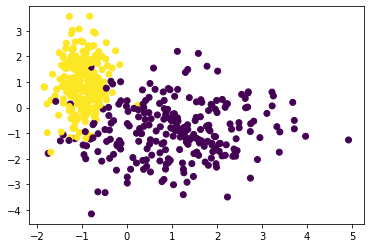

In [64]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [69]:
y  = y.reshape(-1, 1)
y.shape

(500, 1)

In [70]:
ones = np.ones((len(X), 1))
X_new = np.hstack((ones, X))
X_new.shape

(500, 3)

In [71]:
opt_weights, error_list = gradient_descent(X_new, y)

In [72]:
opt_weights.shape

(3, 1)

In [73]:
opt_weights

array([[-1.08],
       [-2.99],
       [ 1.78]])

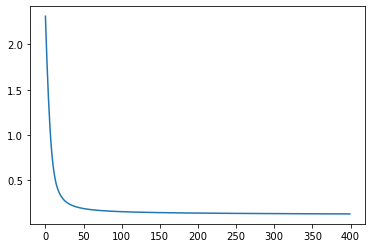

In [74]:
plt.plot(error_list)

### Predicting

In [79]:
y_hat = predict(X_new, opt_weights).round(2)

In [80]:
y_hat.shape

(500, 1)

In [83]:
y_hat[:5]

array([[0.9 ],
       [0.98],
       [0.01],
       [0.  ],
       [0.  ]])

In [84]:
y_pred = y_hat.round()

In [87]:
y_pred[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [88]:
y[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

## Performance of the Model
- Accuracy

In [93]:
(y_pred == y).sum()/len(y)

0.958